In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('Auto.csv')
df1.head()

,mpg,cylinders,displacement,Horse Power,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693,11.5,70,1,buick skylark 320
2,NaN,8.0,318.0,150,3436,11.0,70,1,plymouth satellite
3,NaN,8.0,NaN,150,3433,12.0,70,1,amc rebel sst
4,NaN,8.0,NaN,140,3449,10.5,70,1,ford torino


#### Histogram

In [ ]:
# used on continuous data to identify data distribution --> Stats Concept

(array([13., 75., 71., 60., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

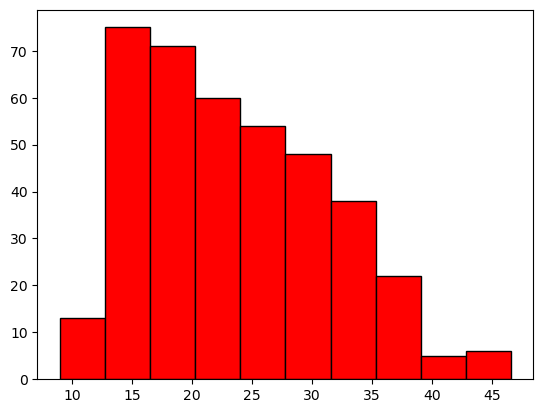

In [4]:
plt.hist(df1['mpg'], edgecolor = 'Black', facecolor = 'Red')

In [6]:
df1['mpg'].nunique() # number unique values in mpg # 129 bars 

129

In [7]:
df1['weight'].nunique() # 350 unique values --> 350 bars

350

In [ ]:
# as number of unique values in continuous data is more random we cant create bar plot here
# histogram is another version of bar plot --> continuous data

In [8]:
df1['mpg'].min()

9.0

In [9]:
df1['mpg'].max()

46.6

In [10]:
# divide the data into multiple buckets / bins--> 10 buckets by default
import numpy as np 
np.linspace(9,46.6, 11)

array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
       42.84, 46.6 ])

In [ ]:
(array([13., 75., 71., 60., 54., 48., 38., 22.,  5.,  6.]), # frequency ( y axis)
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),

In [13]:
df1['mpg'][(df1['mpg'] <= 12.76)].shape # 13 data points # from 9 till 12.76 --> 13 data points

(13,)

In [14]:
df1['mpg'][(df1['mpg'] > 12.76) & (df1['mpg'] <= 16.52)].shape # 12.76 - 16.52  --> 75 data points

(75,)

(array([ 88., 131., 102.,  60.,  11.]),
 array([ 9.  , 16.52, 24.04, 31.56, 39.08, 46.6 ]),
 <BarContainer object of 5 artists>)

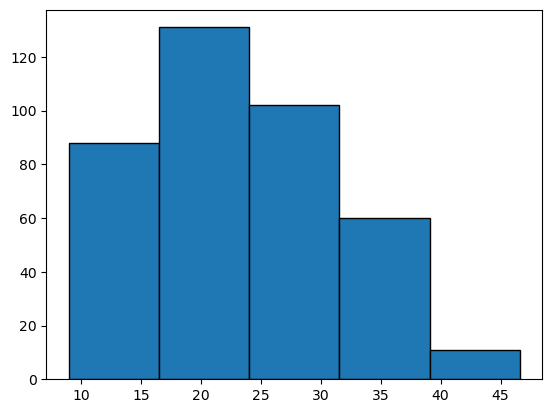

In [17]:
plt.hist(df1['mpg'], edgecolor = 'Black',bins = 5)

#### 

#### Scatter plot

In [19]:
# scatter plot is used between two continuous variables
# it used to identify the realtion between two variables

In [ ]:
# relation between mileage and weight
# if car weight is increasing will mileage dec --> inverseley proportional / negative relation
# directly proportional --> positive relation

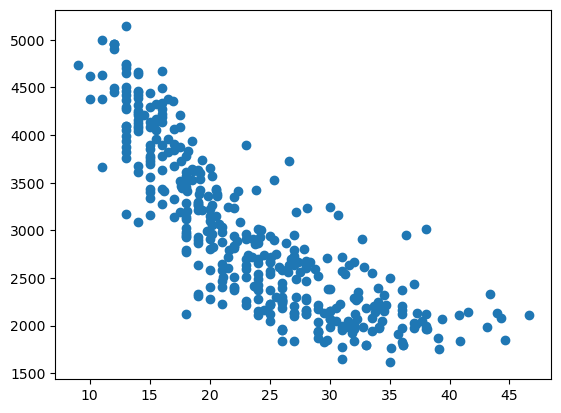

In [20]:
plt.scatter(df1['mpg'],df1['weight']) # validate the relation using scatter plot 

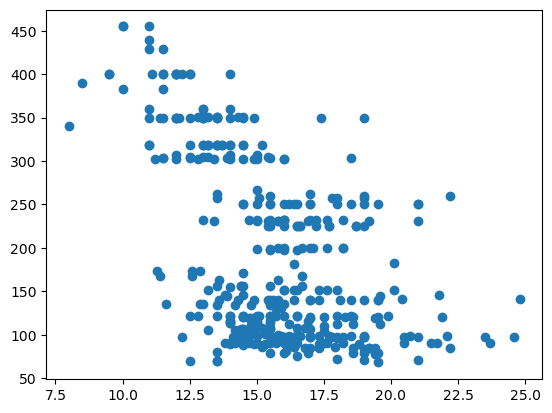

In [21]:
# Assuming you dont anything about cars/mechanical 
# relation between acceleration , displacement

plt.scatter(df1['acceleration'],df1['displacement']) # negative relation --> correlation number is negative ( we calculated math )

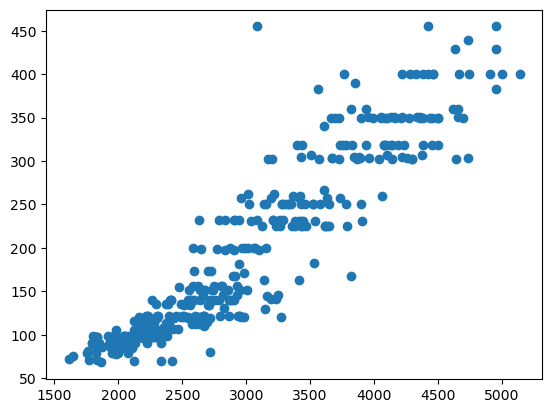

In [22]:
plt.scatter(df1['weight'],df1['displacement']) # directly proportinal / positive relation

In [ ]:
# to quantify the relation between two columns --> Stats concept --> correlation 

In [24]:
df1[['mpg','acceleration','weight','displacement']].corr() # correlation
# symbol --> if symbol is postive --> directly proportional / positive relation and vice versa

,mpg,acceleration,weight,displacement
mpg,1.000000,0.410981,-0.830273,-0.803730
acceleration,0.410981,1.000000,-0.419502,-0.520372
weight,-0.830273,-0.419502,1.000000,0.933743
displacement,-0.803730,-0.520372,0.933743,1.000000


In [ ]:
# how salt is used ( correlation ) 
# sambar / chutney ( linear regression/ stats/ machine learning ....)

# salt cant be used in sweets

## Seaborn

In [25]:
# Advanced data visualisation --> presentation (report/ client)

In [26]:
import seaborn as sns

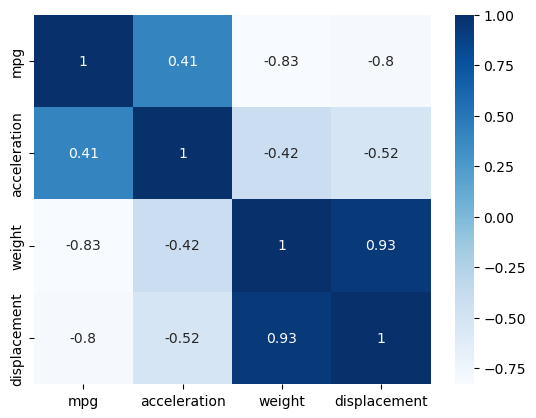

In [43]:
sns.heatmap(df1[['mpg','acceleration','weight','displacement']].corr(), cmap = 'Blues', annot = True)
# plt.xlabel('MPG')
# plt.ylabel('Weight')
# plt.show()
plt.savefig('Heatmap.png') # if no path is mentioned it will be saved in pwd (working directory)

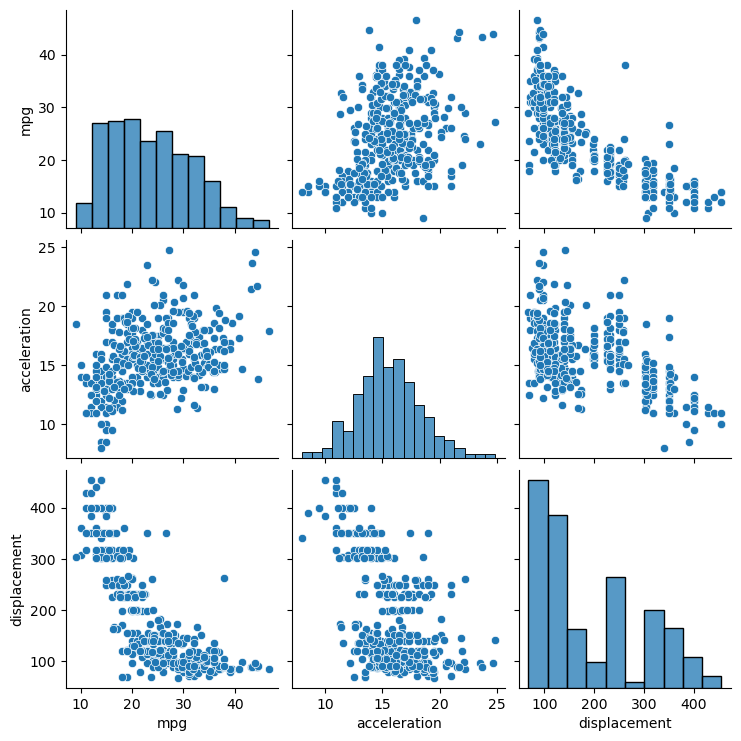

In [45]:
sns.pairplot(df1[['mpg','acceleration','displacement']])

In [46]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.

    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.

    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need 

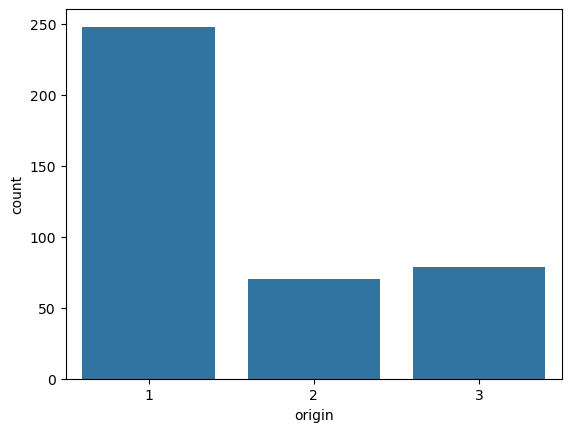

In [48]:
sns.countplot(x = 'origin',data = df1)
plt.show()

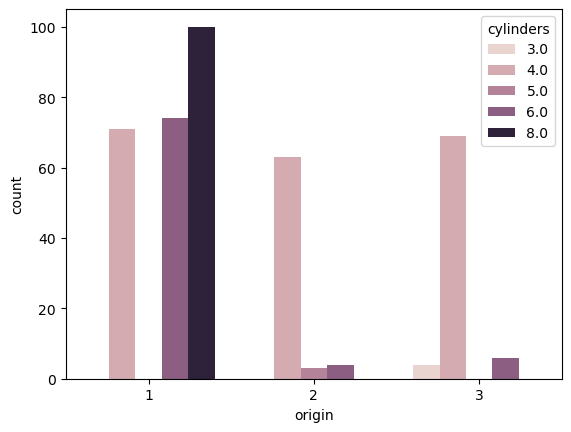

In [49]:
sns.countplot(x = 'origin',data = df1, hue = 'cylinders')
plt.show()

In [55]:
df1.groupby(['origin','cylinders']).size().reset_index()

,origin,cylinders,0
0,1,4.0,71
1,1,6.0,74
2,1,8.0,100
3,2,4.0,63
4,2,5.0,3
5,2,6.0,4
6,3,3.0,4
7,3,4.0,69
8,3,6.0,6


In [56]:
df1['mpg'][(df1['origin'] ==1 ) & (df1['cylinders'] == 4)].shape

(71,)